In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw as pl
import scipy.stats as st


In [130]:
def plot_PL(xmin,xmax,ymax,alpha):
    #return the x and the y of a power law between xmin,xmax with the top left element = ymax
    dx = np.linspace(xmin,xmax,5) #also 2 are enough 
    
    y = dx**(-alpha)
    
    return dx,ymax*y/y[0]
    

In [153]:
r = pd.read_csv('long_series_logret.csv',index_col=0)
r.index = pd.DatetimeIndex(r.index)
r = r['NAV']

In [154]:
len(r)

14661

In [144]:
r.isna().sum()

0

In [132]:
#Inspecting the distribution

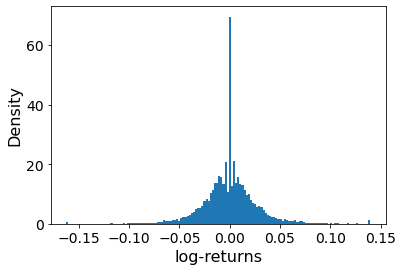

In [139]:
plt.hist(r,bins='auto',density=True)
plt.xlabel('log-returns',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [141]:
# There is a suspicius spike at zero

Text(0.5, 0, 'Time')

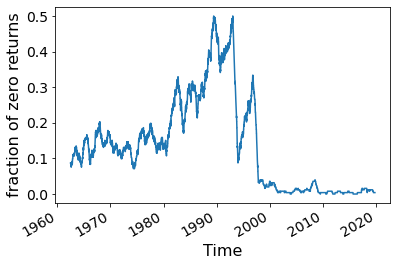

In [110]:
(r==0).rolling(252,center=True).mean().plot()
plt.tick_params(labelsize=14)
plt.ylabel('fraction of zero returns',fontsize=16)
plt.xlabel('Time',fontsize=16)

In [111]:
# Probably they changed the way of recording the returns. 

In [112]:
#The powerlaw fit is robust because it try to fit only the tail

ft = pl.Fit(abs(r))

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/usr/local/lib/python3.8/dist-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


In [113]:
ft.alpha,ft.xmin

(4.11858091455238, 0.056618928213463676)

In [114]:
# The t-student fit is less because it try to fit the whole distribution

v,loc,scale = st.t.fit(r)

In [115]:
v

2.6138054246862303

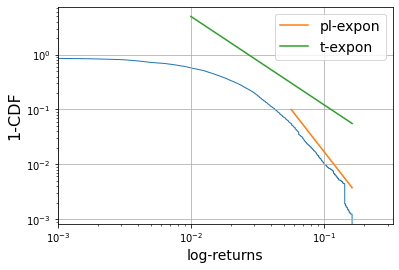

In [119]:
bn = sorted(set(abs(r))) # CDF can be binless, it is not useful having a bin lower than the observations

plt.hist(abs(r),bins=bn,density=True,cumulative=-1,histtype='step')

dx,dy = plot_PL(ft.xmin,max(abs(r)),1e-1,ft.alpha-1)
plt.plot(dx,dy,label='pl-expon')

dx,dy = plot_PL(1e-2,max(abs(r)),5,v-1)
plt.plot(dx,dy,label='t-expon')


plt.yscale('log')
plt.xscale('log')
plt.xlim(xmin=1e-3)
plt.xlabel('log-returns',fontsize=14)
plt.ylabel('1-CDF',fontsize=16)
plt.legend(loc='best',fontsize=14)
plt.grid()

In [145]:
r = r[r.index.year>2000]

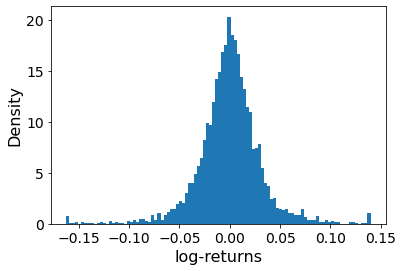

In [147]:
plt.hist(r,bins=100,density=True)
plt.xlabel('log-returns',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [148]:
#The powerlaw fit is robust because it try to fit only the tail

ft = pl.Fit(abs(r))

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/usr/local/lib/python3.8/dist-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


In [149]:
ft.alpha,ft.xmin

(3.1675733318462473, 0.0334519951427704)

In [150]:
# The t-student fit is less because it try to fit the whole distribution

v,loc,scale = st.t.fit(r)

In [151]:
v,loc,scale

(3.1169323602192893, -1.728469762800317e-05, 0.020185921482117584)

In [ ]:
#Plot the 1-CDF 

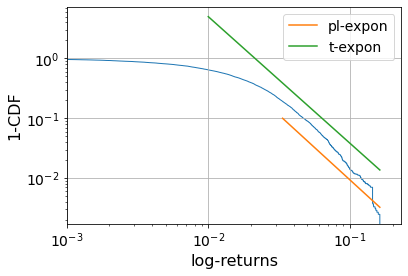

In [128]:
bn = sorted(set(abs(r))) # CDF can be binless, it is not useful having a bin lower than the observations

plt.hist(abs(r),bins=bn,density=True,cumulative=-1,histtype='step')

dx,dy = plot_PL(ft.xmin,max(abs(r)),1e-1,ft.alpha-1)
plt.plot(dx,dy,label='pl-expon')

dx,dy = plot_PL(1e-2,max(abs(r)),5,v-1)
plt.plot(dx,dy,label='t-expon')


plt.yscale('log')
plt.xscale('log')
plt.xlim(xmin=1e-3)
plt.xlabel('log-returns',fontsize=16)
plt.ylabel('1-CDF',fontsize=16)
plt.legend(loc='best',fontsize=14)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

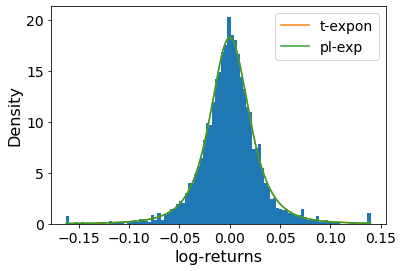

In [152]:
m,M = min(r),max(r)
dx = np.linspace(m,M,1000)
plt.hist(r,bins=100,density=True)
plt.plot(dx,st.t.pdf(dx,v,loc,scale),label='t-expon')
plt.plot(dx,st.t.pdf(dx,ft.alpha,loc,scale),label='pl-exp')

plt.xlabel('log-returns',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.legend(loc='best',fontsize=14)


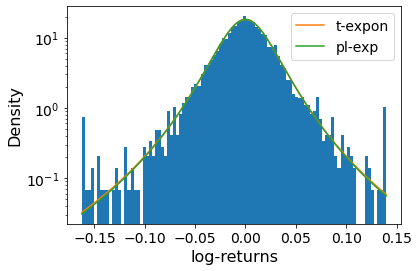

In [101]:
m,M = min(r),max(r)
dx = np.linspace(m,M,1000)
plt.hist(r,bins=100,density=True)
plt.plot(dx,st.t.pdf(dx,v,loc,scale),label='t-expon')
plt.plot(dx,st.t.pdf(dx,ft.alpha,loc,scale),label='pl-exp')
plt.yscale('log')
plt.xlabel('log-returns',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.legend(loc='best',fontsize=14)


In [103]:
# Both estimators are quite good

In [67]:
T = r.shape[0]

dt=1000
A =[]
for t in np.arange(0,T-dt,15):
    tm = r.index[t]+(r.index[t+dt]-r.index[t])/2
    
    rs = r.iloc[t:t+dt]
    v = st.t.fit( rs )[0]
    A.append( (tm,pl.Fit( abs(rs) ).alpha,v)) 
    print(A[-1])

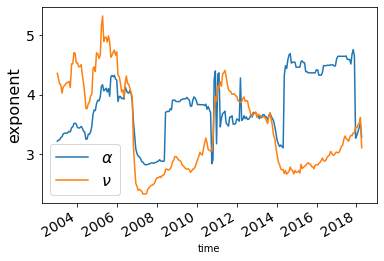

In [95]:
pd.DataFrame(A,columns=['time',r'$α$',r'$\nu$']).set_index('time').plot()
plt.tick_params(labelsize=14)
plt.ylabel('exponent',fontsize=16)
plt.legend(fontsize=16)

In [96]:
# Fitting the exponent is not easy